In [1]:
import sys
sys.path.append("../../../dataset/")
from datasets import TrainDataset, TestDataset, ValDataset
import transforms as tran
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from train_segformer import train, visualize_example
from transformers import SegformerForSemanticSegmentation

/home/ziereis/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
def eval_normalizations():
    train_for_cal = TrainDataset('../../../data/', transform=tran.ToTensor())
    psum    = torch.tensor([0.0, 0.0, 0.0])
    psum_sq = torch.tensor([0.0, 0.0, 0.0])
    count = len(train_for_cal) * 512 * 512
    loader_for_cal = DataLoader(train_for_cal, batch_size=32, shuffle=False)

    for inputs, mask in loader_for_cal:
        psum    += inputs.sum(axis        = [0, 2, 3])
        psum_sq += (inputs ** 2).sum(axis = [0, 2, 3])

    total_mean = psum / count
    total_var  = (psum_sq / count) - (total_mean ** 2)
    total_std  = torch.sqrt(total_var)

    t_base = tran.Compose([
        tran.ToTensor(mask_as_integer=True),
    ])
    t_05 = tran.Compose([
        tran.ToTensor(mask_as_integer=True),
        tran.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5)) 
    ])
    t_ms = tran.Compose([
        tran.ToTensor(mask_as_integer=True),
        tran.Normalize(total_mean, total_std) 
    ])
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    model = SegformerForSemanticSegmentation.from_pretrained(
        "nvidia/mit-b0", 
        num_labels=4,
    ).to(device)
    train("mit-b0_norm_base", model, 0.0006, 30, 2, t_base, t_base)

    model = SegformerForSemanticSegmentation.from_pretrained(
        "nvidia/mit-b0", 
        num_labels=4,
    ).to(device)
    train("mit-b0_norm_05", model, 0.0006, 30, 2, t_05, t_05)

    model = SegformerForSemanticSegmentation.from_pretrained(
        "nvidia/mit-b0", 
        num_labels=4,
    ).to(device)
    train("mit-b0_norm_ms", model, 0.0006, 30, 2, t_ms, t_ms)



eval_normalizations()

In [ ]:
def eval_model():
    train_for_cal = TrainDataset('../data/', transform=tran.ToTensor())
    psum    = torch.tensor([0.0, 0.0, 0.0])
    psum_sq = torch.tensor([0.0, 0.0, 0.0])
    count = len(train_for_cal) * 512 * 512
    loader_for_cal = DataLoader(train_for_cal, batch_size=32, shuffle=False)

    for inputs, mask in loader_for_cal:
        psum    += inputs.sum(axis        = [0, 2, 3])
        psum_sq += (inputs ** 2).sum(axis = [0, 2, 3])

    total_mean = psum / count
    total_var  = (psum_sq / count) - (total_mean ** 2)
    total_std  = torch.sqrt(total_var)

    t_ms = tran.Compose([
        tran.ToTensor(mask_as_integer=True),
        tran.Normalize(total_mean, total_std) 
    ])
    t_base = tran.Compose([
        tran.ToTensor(mask_as_integer=True),
    ])


    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    model = SegformerForSemanticSegmentation.from_pretrained(
        "nvidia/mit-b0", 
        num_labels=4,
    ).to(device)
    train("mit-b0_norm_base", model, 0.0006, 30, 2, t_base, t_base)

    model = SegformerForSemanticSegmentation.from_pretrained(
        "nvidia/mit-b1", 
        num_labels=4,
    ).to(device)

    train("mit-b1_ms_model", model, 0.0006, 50, 2, t_ms, t_ms)

    model = SegformerForSemanticSegmentation.from_pretrained(
        "nvidia/mit-b2", 
        num_labels=4,
    ).to(device)
    train("mit-b2_ms_model", model, 0.0006, 50, 2, t_ms, t_ms)

    model = SegformerForSemanticSegmentation.from_pretrained(
        "nvidia/mit-b3", 
        num_labels=4,
    ).to(device)
    train("mit-b3_ms_model", model, 0.0006, 50, 2, t_ms, t_ms)

    model = SegformerForSemanticSegmentation.from_pretrained(
        "nvidia/mit-b4", 
        num_labels=4,
    ).to(device)
    train("mit-b4_ms_model", model, 0.0006, 50, 2, t_ms, t_ms)

eval_model()

Some weights of SegformerForSemanticSegmentation were not initialized from the model checkpoint at nvidia/mit-b2 and are newly initialized: ['decode_head.linear_fuse.weight', 'decode_head.batch_norm.running_var', 'decode_head.classifier.bias', 'decode_head.linear_c.1.proj.bias', 'decode_head.batch_norm.num_batches_tracked', 'decode_head.linear_c.1.proj.weight', 'decode_head.linear_c.3.proj.weight', 'decode_head.batch_norm.bias', 'decode_head.linear_c.2.proj.bias', 'decode_head.batch_norm.running_mean', 'decode_head.linear_c.2.proj.weight', 'decode_head.batch_norm.weight', 'decode_head.linear_c.3.proj.bias', 'decode_head.linear_c.0.proj.weight', 'decode_head.linear_c.0.proj.bias', 'decode_head.classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Device: cuda:0
Epoch 1, Train Loss: 0.29141797923963836, Train Acc: 18.750209396123058, Train IoU: 0.21262303848404193, Test Loss: 0.15146428780737986, Test Acc: 34.724736801539, Test IoU: 0.35845328177648567
Epoch 2, Train Loss: 0.18616575700857865, Train Acc: 32.21501724564993, Train IoU: 0.3488930743092003, Test Loss: 0.12756989872437124, Test Acc: 39.35935772182522, Test IoU: 0.40225935042042926
Epoch 3, Train Loss: 0.1637171733868765, Train Acc: 37.07698761663543, Train IoU: 0.3971170449324039, Test Loss: 0.12027817955317575, Test Acc: 40.44801545293101, Test IoU: 0.3943448295194896
Epoch 4, Train Loss: 0.14442268016693346, Train Acc: 40.184898566370336, Train IoU: 0.4299467066305157, Test Loss: 0.11058749626429121, Test Acc: 50.70194121153873, Test IoU: 0.49704737250338965
Epoch 5, Train Loss: 0.14049660270497982, Train Acc: 43.08454449005422, Train IoU: 0.45190854795986435, Test Loss: 0.14829549108716575, Test Acc: 22.370571478457286, Test IoU: 0.2231169266433055
Epoch 6, Train 

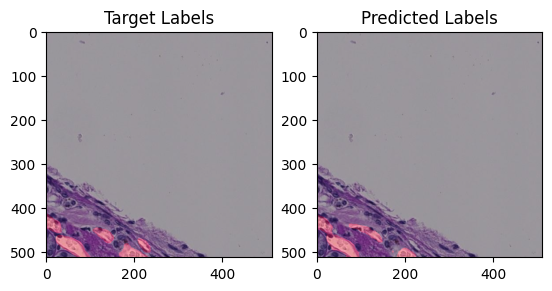

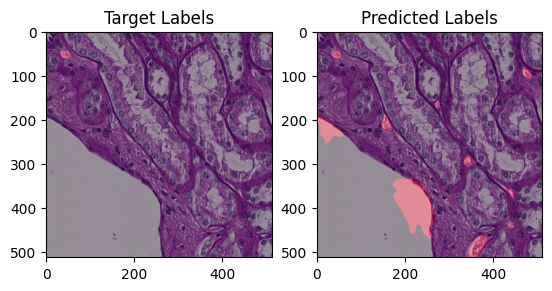

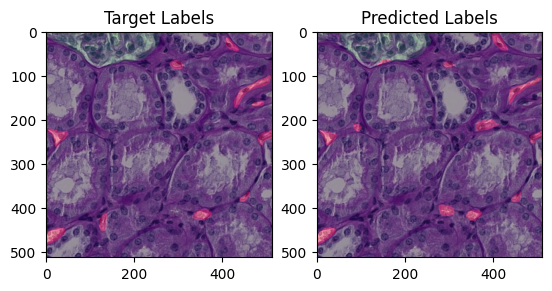

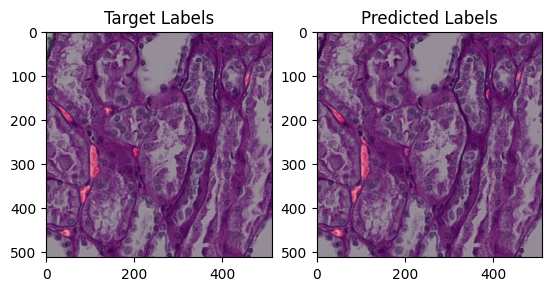

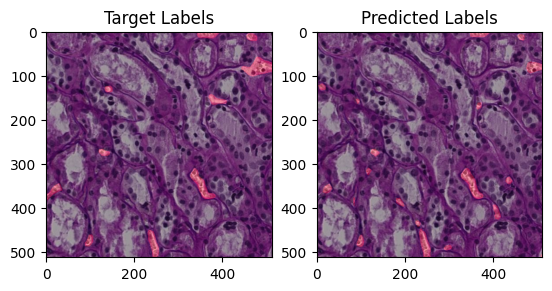

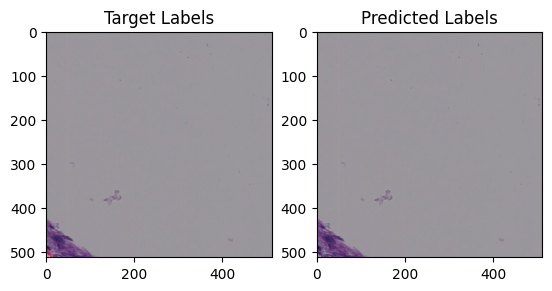

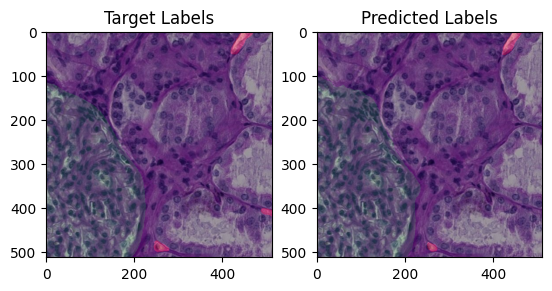

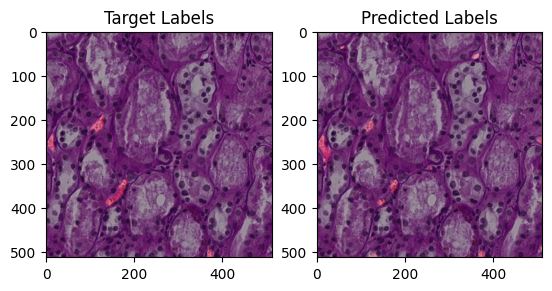

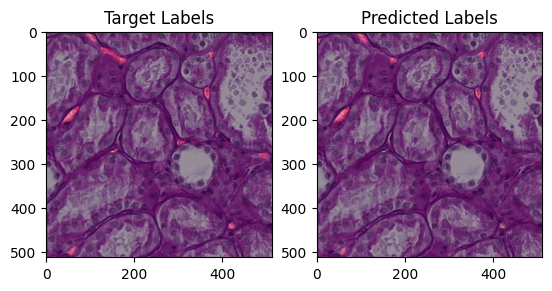

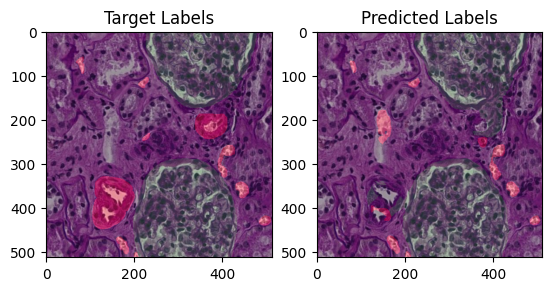

Some weights of SegformerForSemanticSegmentation were not initialized from the model checkpoint at nvidia/mit-b2 and are newly initialized: ['decode_head.linear_fuse.weight', 'decode_head.batch_norm.running_var', 'decode_head.classifier.bias', 'decode_head.linear_c.1.proj.bias', 'decode_head.batch_norm.num_batches_tracked', 'decode_head.linear_c.1.proj.weight', 'decode_head.linear_c.3.proj.weight', 'decode_head.batch_norm.bias', 'decode_head.linear_c.2.proj.bias', 'decode_head.batch_norm.running_mean', 'decode_head.linear_c.2.proj.weight', 'decode_head.batch_norm.weight', 'decode_head.linear_c.3.proj.bias', 'decode_head.linear_c.0.proj.weight', 'decode_head.linear_c.0.proj.bias', 'decode_head.classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Device: cuda:0
Epoch 1, Train Loss: 0.31981313307130455, Train Acc: 10.58400399749727, Train IoU: 0.1256953643396552, Test Loss: 0.17306102467469933, Test Acc: 28.905821117852195, Test IoU: 0.3229857590261452
Epoch 2, Train Loss: 0.20834252834807035, Train Acc: 27.448660365931357, Train IoU: 0.2976497705118344, Test Loss: 0.15196267022820545, Test Acc: 29.445981593017237, Test IoU: 0.28728412008715
Epoch 3, Train Loss: 0.18322607931480103, Train Acc: 33.09363621915792, Train IoU: 0.3565098443412551, Test Loss: 0.16017777671313976, Test Acc: 32.55056729433712, Test IoU: 0.3394777096831277
Epoch 4, Train Loss: 0.16532901962123372, Train Acc: 35.48637887168062, Train IoU: 0.3809333031728971, Test Loss: 0.12012215400468712, Test Acc: 42.15438145019088, Test IoU: 0.40344117705144283
Epoch 5, Train Loss: 0.1519169816108165, Train Acc: 38.02289970319442, Train IoU: 0.40259327400422695, Test Loss: 0.1860429624880641, Test Acc: 41.91576076270533, Test IoU: 0.42926497572884686
Epoch 6, Train Los

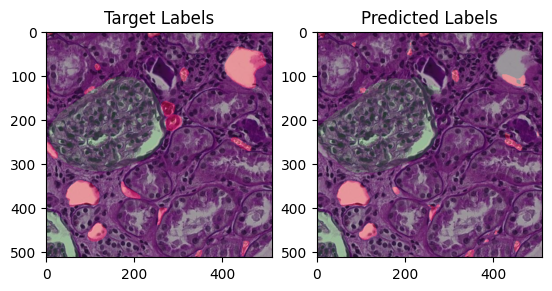

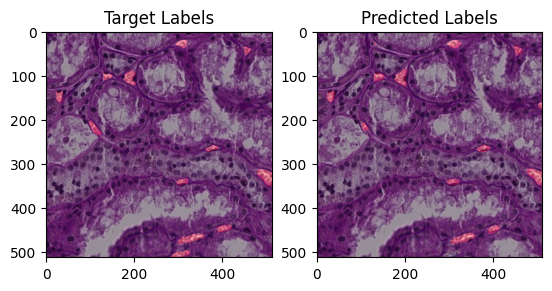

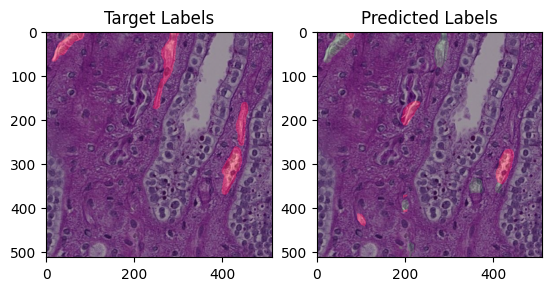

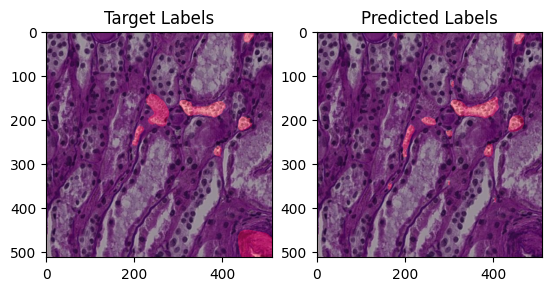

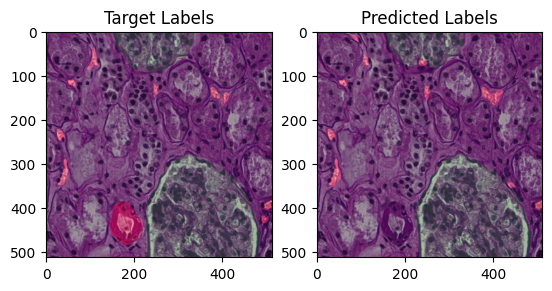

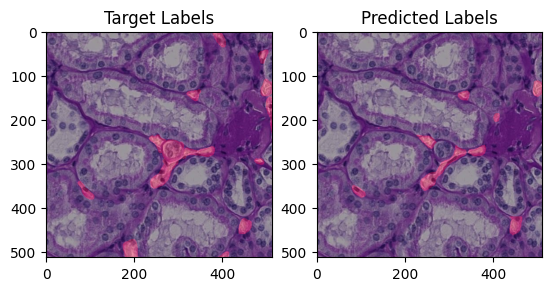

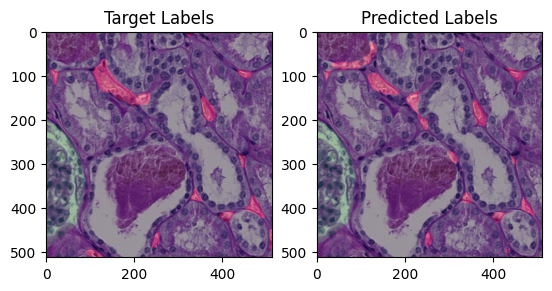

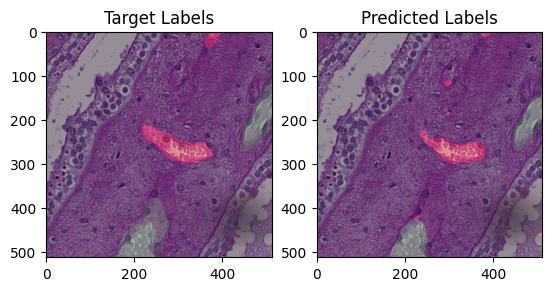

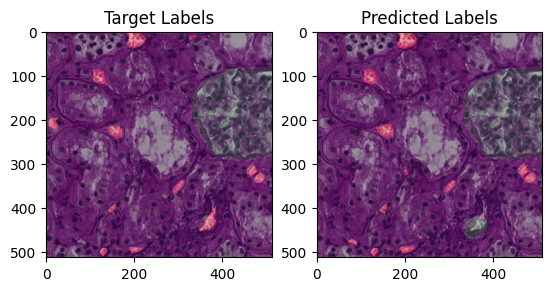

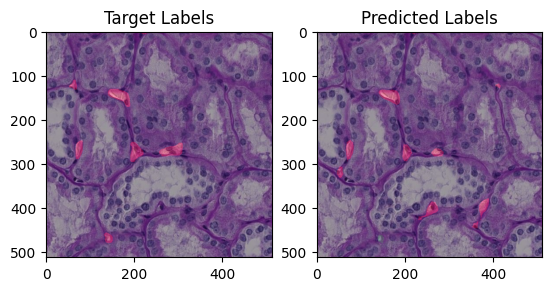

In [ ]:
def eval_size():
    train_for_cal = TrainDataset('../data/', transform=tran.ToTensor())
    psum    = torch.tensor([0.0, 0.0, 0.0])
    psum_sq = torch.tensor([0.0, 0.0, 0.0])
    count = len(train_for_cal) * 512 * 512
    loader_for_cal = DataLoader(train_for_cal, batch_size=32, shuffle=False)

    for inputs, mask in loader_for_cal:
        psum    += inputs.sum(axis        = [0, 2, 3])
        psum_sq += (inputs ** 2).sum(axis = [0, 2, 3])

    total_mean = psum / count
    total_var  = (psum_sq / count) - (total_mean ** 2)
    total_std  = torch.sqrt(total_var)

    t_base = tran.Compose([
        tran.ToTensor(mask_as_integer=True),
        tran.Normalize(total_mean, total_std)
    ])
    t_256 = tran.Compose([
        tran.ToTensor(mask_as_integer=True),
        tran.Normalize(total_mean, total_std),
        tran.Resize((256,256))
    ])
    t_128 = tran.Compose([
        tran.ToTensor(mask_as_integer=True),
        tran.Normalize(total_mean, total_std),
        tran.Resize((256,256))
    ])

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


    model = SegformerForSemanticSegmentation.from_pretrained(
        "nvidia/mit-b2", 
        num_labels=4,
    ).to(device)
    train("mit-b2_sizes_128", model, 0.0006, 50, 2, t_128, t_128)

    model = SegformerForSemanticSegmentation.from_pretrained(
        "nvidia/mit-b2", 
        num_labels=4,
    ).to(device)
    train("mit-b2_sizes_256", model, 0.0006, 50, 2, t_256, t_256)

eval_size()


In [ ]:
def eval_lr():
    train_for_cal = TrainDataset('../data/', transform=tran.ToTensor())
    psum    = torch.tensor([0.0, 0.0, 0.0])
    psum_sq = torch.tensor([0.0, 0.0, 0.0])
    count = len(train_for_cal) * 512 * 512
    loader_for_cal = DataLoader(train_for_cal, batch_size=32, shuffle=False)

    for inputs, mask in loader_for_cal:
        psum    += inputs.sum(axis        = [0, 2, 3])
        psum_sq += (inputs ** 2).sum(axis = [0, 2, 3])

    total_mean = psum / count
    total_var  = (psum_sq / count) - (total_mean ** 2)
    total_std  = torch.sqrt(total_var)

    t_base = tran.Compose([
        tran.ToTensor(mask_as_integer=True),
        tran.Normalize(total_mean, total_std)
    ])

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


    model = SegformerForSemanticSegmentation.from_pretrained(
        "nvidia/mit-b2", 
        num_labels=4,
    ).to(device)
    train("mit-b2_lr_0.0001", model, 0.0001, 50, 2, t_base, t_base)

    model = SegformerForSemanticSegmentation.from_pretrained(
        "nvidia/mit-b2", 
        num_labels=4,
    ).to(device)
    train("mit-b2_lr_0.00001", model, 0.00001, 20, 2, t_base, t_base)

eval_lr()


In [ ]:
def eval_aug():
    train_for_cal = TrainDataset('../data/', transform=tran.ToTensor())
    psum    = torch.tensor([0.0, 0.0, 0.0])
    psum_sq = torch.tensor([0.0, 0.0, 0.0])
    count = len(train_for_cal) * 512 * 512
    loader_for_cal = DataLoader(train_for_cal, batch_size=32, shuffle=False)

    for inputs, mask in loader_for_cal:
        psum    += inputs.sum(axis        = [0, 2, 3])
        psum_sq += (inputs ** 2).sum(axis = [0, 2, 3])

    total_mean = psum / count
    total_var  = (psum_sq / count) - (total_mean ** 2)
    total_std  = torch.sqrt(total_var)

    t_train = tran.Compose([
        tran.ToTensor(mask_as_integer=True),
        tran.Normalize(total_mean, total_std),
        tran.RandomHorizontalFlip(),
        tran.RandomVerticalFlip(),
        tran.RandomHueSaturationValue()
    ])
    t_val = tran.Compose([
        tran.ToTensor(mask_as_integer=True),
        tran.Normalize(total_mean, total_std)
    ])

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


    model = SegformerForSemanticSegmentation.from_pretrained(
        "nvidia/mit-b2", 
        num_labels=4,
    ).to(device)
    train("mit-b2_lr_0.0001", model, 0.0001, 50, 2, t_base, t_base)

    model = SegformerForSemanticSegmentation.from_pretrained(
        "nvidia/mit-b2", 
        num_labels=4,
    ).to(device)

    train("mit-b2_aug_flip__HSV_0.0001", model, 0.0001, 40, 2, t_train, t_val)

eval_aug()